In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### 1 Graph construction

In [2]:
g = nx.Graph()
edges1= [(1, 2), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (4, 5)]
edges2 =[(6, 7), (6, 8), (6, 9), (6, 7), (7, 8), (7, 10), (8, 9), (8, 10), (9, 10)]
edges3 = [(11, 12), (11, 13), (11, 14), (12, 13), (12, 15), (13, 14), (13, 15), (14, 15)]
g.add_edges_from(edges1)
g.add_edges_from(edges2)
g.add_edges_from(edges3)

In [3]:
g.number_of_nodes()

15

In [4]:
g.number_of_edges()

23

In [5]:
nx.number_connected_components(g)

3

In [6]:
fname='graph.txt'
nx.write_adjlist(g,fname)

### 2 Graph loading and visualization

In [7]:
g = nx.read_adjlist(fname, nodetype=int)

In [8]:
g.nodes

NodeView((1, 2, 5, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

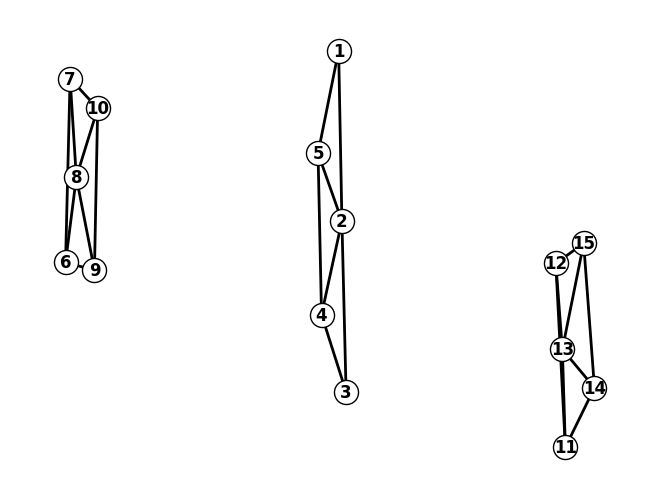

In [9]:
nx.draw(g, with_labels = True, font_color = 'black', font_weight = 'bold', width = 2, node_color='white', edgecolors = 'black')
plt.savefig('task2.jpg')

### 3 Nodes positioning


In [10]:
pos = {
    1: (0, 0), 
    2: (1, 0), 
    3: (1, 2), 
    4: (2, 1), 
    5: (1, -1),
    6: (3, 0), 
    7: (4, 0), 
    8: (4, 2), 
    9: (4, -2), 
    10: (5, 0),
    11: (6, 0), 
    12: (7, 0), 
    13: (7, 2), 
    14: (7, -2), 
    15: (8, 0)
}

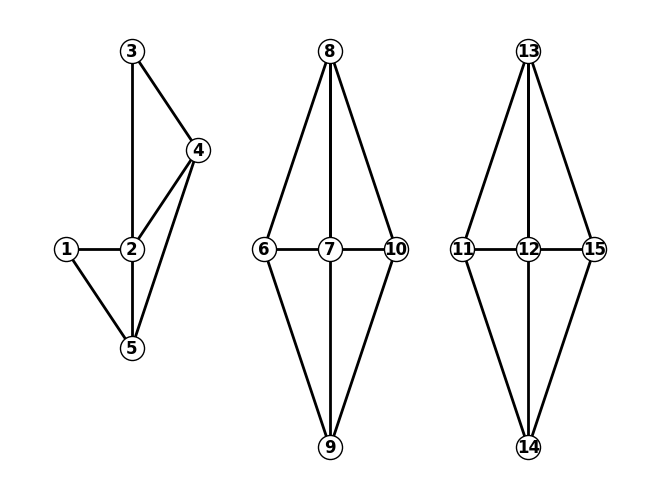

In [11]:
nx.draw(g, pos, with_labels = True, font_color = 'black', font_weight = 'bold', width=2, node_color='white', edgecolors = 'black')
plt.savefig('task3.jpg')

### 4 Connected components


In [12]:
for el in nx.connected_components(g):
    subg = g.subgraph(el)
    degrees = dict(subg.degree())
    ecc = dict(nx.eccentricity(subg))
    print(f'Connected component {el}:')
    print(f'Number of nodes: {subg.number_of_nodes()}, number of edges: {subg.number_of_edges()}')
    print(f'Degrees of nodes: {degrees}')
    print(f'Radius: {nx.radius(subg)}, diameter: {nx.diameter(subg)}')
    print(f'Eccentrecities: {ecc}')
    print()

Connected component {1, 2, 3, 4, 5}:
Number of nodes: 5, number of edges: 7
Degrees of nodes: {1: 2, 2: 4, 3: 2, 4: 3, 5: 3}
Radius: 1, diameter: 2
Eccentrecities: {1: 2, 2: 1, 3: 2, 4: 2, 5: 2}

Connected component {6, 7, 8, 9, 10}:
Number of nodes: 5, number of edges: 8
Degrees of nodes: {6: 3, 7: 3, 8: 4, 9: 3, 10: 3}
Radius: 1, diameter: 2
Eccentrecities: {6: 2, 7: 2, 8: 1, 9: 2, 10: 2}

Connected component {11, 12, 13, 14, 15}:
Number of nodes: 5, number of edges: 8
Degrees of nodes: {11: 3, 12: 3, 13: 4, 14: 3, 15: 3}
Radius: 1, diameter: 2
Eccentrecities: {11: 2, 12: 2, 13: 1, 14: 2, 15: 2}



### 5 Diameters of nontrivial connected components

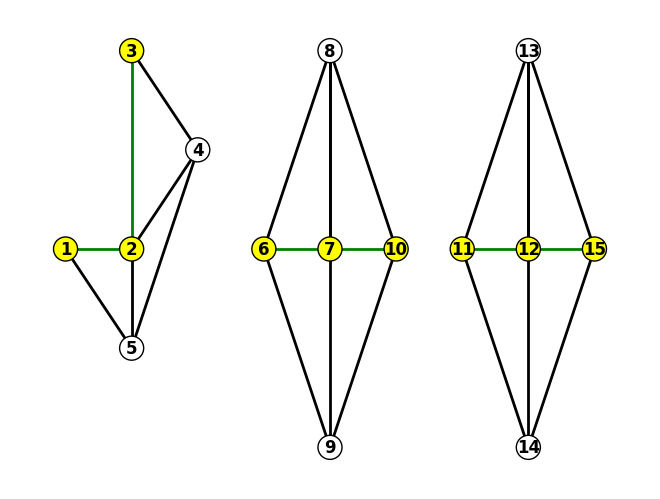

In [13]:
for el in nx.connected_components(g):
    if len(el)>1:
        subg = g.subgraph(el).copy()
        ecc = dict(nx.eccentricity(subg))
        mnode = max(ecc, key = lambda el: ecc[el])
        paths = nx.single_source_shortest_path(subg, mnode)
        diam = max(paths.values(), key=len)
        for i in range(len(diam) - 1):
            g.nodes[diam[i]]['color'] = 'yellow'
            g.edges[diam[i], diam[i + 1]]['color'] = 'green'
        g.nodes[diam[-1]]['color'] = 'yellow'
nx.draw(g, pos, with_labels = True, font_color = 'black', font_weight = 'bold', width = 2, edgecolors = 'black',
        edge_color =[color for v, w, color in g.edges(data = 'color', default = 'black')], 
        node_color = [color for v, color in g.nodes(data ='color', default = 'white')])

### 6 Depth spanning forest


In [14]:
def reset(G, node_color='white', edge_color='black'):
    for node in G.nodes:
        G.nodes[node]['color'] = node_color
    for edge in G.edges:
        G.edges[edge]['color'] = edge_color

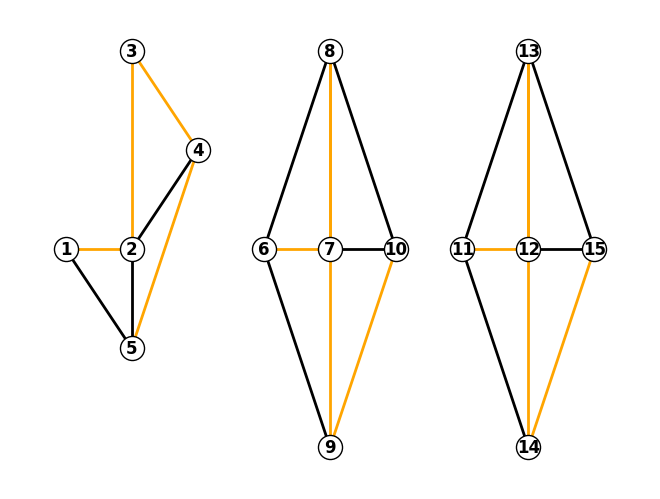

In [15]:
reset(g)
for el in nx.connected_components(g):
    subg = g.subgraph(el).copy()
    sptree = nx.dfs_tree(subg) #spanning tree
    g.add_edges_from(sptree.edges(), color = 'orange')
nx.draw(g, pos, with_labels = True, font_color = 'black', font_weight = 'bold', node_color='white', edgecolors = 'black', width = 2,
        edge_color =[color for v, w, color in g.edges(data = 'color', default = 'black')])